In [1457]:
# imports
import pandas as pd

# data visualization
import seaborn as sns

In [1458]:
ds = pd.read_excel("rainData.xlsx")
ds.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-08-2019,24.0,32.4,27.3,67.0,0.0,8.8,5.0,130.0,2.0,E
1,02-08-2019,23.0,32.9,27.8,68.0,0.0,9.3,5.0,130.0,2.0,E
2,03-08-2019,23.0,32.2,26.6,69.0,0.0,9.4,6.0,120.0,2.0,E
3,04-08-2019,23.0,32.6,27.2,63.0,0.0,9.0,5.0,170.0,2.0,E
4,05-08-2019,22.0,32.4,26.7,64.0,0.0,9.2,4.0,80.0,2.0,E


In [1459]:
# drop Tanggal column since it does not have any correlation with other data at all
ds = ds.drop(["Tanggal"], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       1228 non-null   float64
 1   Tx       1233 non-null   float64
 2   Tavg     1233 non-null   float64
 3   RH_avg   1233 non-null   float64
 4   RR       1115 non-null   float64
 5   ss       1232 non-null   float64
 6   ff_x     1233 non-null   float64
 7   ddd_x    1233 non-null   float64
 8   ff_avg   1233 non-null   float64
 9   ddd_car  1233 non-null   object 
dtypes: float64(9), object(1)
memory usage: 96.5+ KB


In [1460]:
ds["ddd_car"] = ds["ddd_car"].astype("string")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       1228 non-null   float64
 1   Tx       1233 non-null   float64
 2   Tavg     1233 non-null   float64
 3   RH_avg   1233 non-null   float64
 4   RR       1115 non-null   float64
 5   ss       1232 non-null   float64
 6   ff_x     1233 non-null   float64
 7   ddd_x    1233 non-null   float64
 8   ff_avg   1233 non-null   float64
 9   ddd_car  1233 non-null   string 
dtypes: float64(9), string(1)
memory usage: 96.5 KB


**Drop NaN Values**

In [1461]:
ds = ds.dropna()
ds = ds[ds["RR"] != 8888]
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       1060 non-null   float64
 1   Tx       1060 non-null   float64
 2   Tavg     1060 non-null   float64
 3   RH_avg   1060 non-null   float64
 4   RR       1060 non-null   float64
 5   ss       1060 non-null   float64
 6   ff_x     1060 non-null   float64
 7   ddd_x    1060 non-null   float64
 8   ff_avg   1060 non-null   float64
 9   ddd_car  1060 non-null   string 
dtypes: float64(9), string(1)
memory usage: 91.1 KB


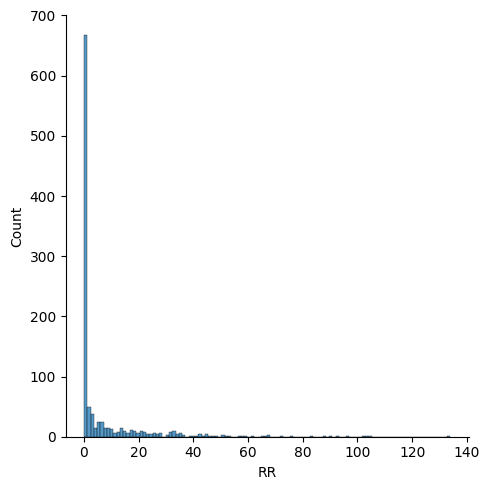

In [1462]:
sns.displot(ds["RR"])

**Data Labeling**

In [1463]:
# change "RR" column values to 0 and 1
# 0 means not raining while 1 means the otherwise
ds.loc[(ds["RR"] < 0.5), "RR"] = 0
ds.loc[(ds["RR"] >= 0.5), "RR"] = 1
ds["RR"].value_counts()

0.0    633
1.0    427
Name: RR, dtype: int64

In [1464]:
ds["ddd_car"].value_counts()

C     732
E     247
SE     35
N      21
NW     13
W       9
S       3
Name: ddd_car, dtype: Int64

In [1465]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ds["ddd_car"] = le.fit_transform(ds["ddd_car"])
ds["ddd_car"].value_counts()

0    732
1    247
5     35
2     21
3     13
6      9
4      3
Name: ddd_car, dtype: int64

**Model Training and Testing**

In [1466]:
# split data
X = ds.drop(columns=["RR"])
y = ds[["RR"]]

In [1467]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

# for random in random_state:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

In [1468]:
# import matplotlib.pyplot as plt

# plt.plot(random_state, accuracies)
# plt.title('Accuracies based on random state')
# plt.xlabel('Random State')
# plt.ylabel('Accuracies')
# plt.show()

In [1469]:
# plt.plot(random_state, precisions)
# plt.title('precisions based on random state')
# plt.xlabel('Random State')
# plt.ylabel('precisions')
# plt.show()

In [1470]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

regular_model = KNeighborsClassifier()
cv = KFold(n_splits=5, shuffle=True, random_state=7)

param_grid = {'n_neighbors': np.arange(1, 26, 2)}
model = GridSearchCV(regular_model, param_grid, cv=cv)
model.fit(X_train, y_train)



c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])})

In [1471]:
def makePrediction(model, data):
    y_pred = model.predict(data)
    return y_pred

In [1472]:
y_pred = makePrediction(model, X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.8726415094339622
Precision: 0.8
